<a href="https://colab.research.google.com/github/Vaishali9522/LoanPrediction/blob/master/LoanPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train = pd.read_csv('/content/drive/My Drive/analytics vidhya/train_ctrUa4K.csv')
test = pd.read_csv('/content/drive/My Drive/analytics vidhya/test_lAUu6dG.csv')

In [0]:
train_original = train.copy()
test_original = test.copy()

In [4]:
train.columns
len(train.columns)

13

In [5]:
test.columns
len(test.columns)

12

In [6]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
train.shape, test.shape

((614, 13), (367, 12))

In [9]:
train['Loan_Status'].value_counts()     # frequency

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
train['Loan_Status'].value_counts(normalize=True)     # percentage

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

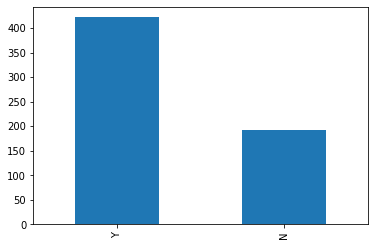

In [11]:
train['Loan_Status'].value_counts().plot.bar()

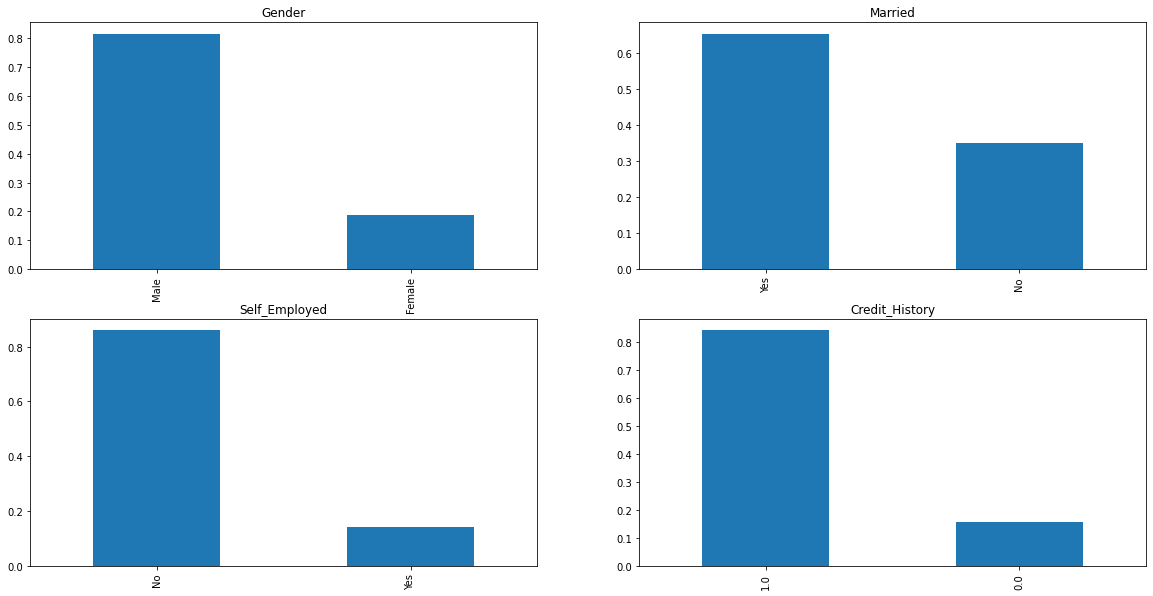

In [12]:
fig = plt.figure()
plt.subplot(2,2,1)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(2,2,2)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Married')

plt.subplot(2,2,3)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Self_Employed')

plt.subplot(2,2,4)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Credit_History')

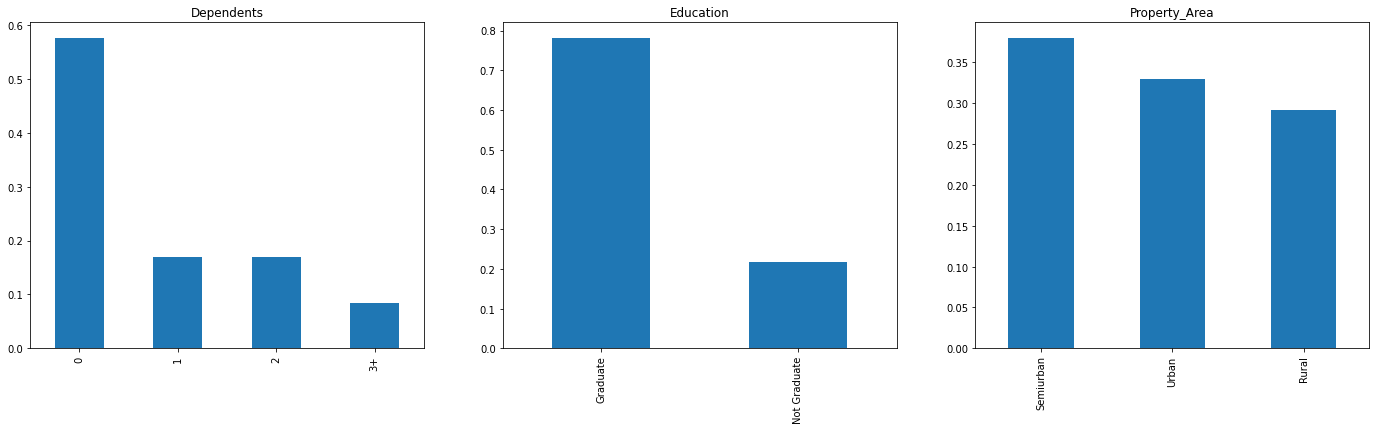

In [13]:
plt.figure() 
plt.subplot(1,3,1) 
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 
plt.subplot(1,3,2) 
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(1,3,3) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

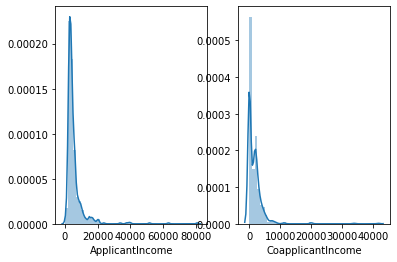

In [14]:
plt.figure() 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']);

plt.subplot(122) 
sns.distplot(train['CoapplicantIncome']);

plt.show()

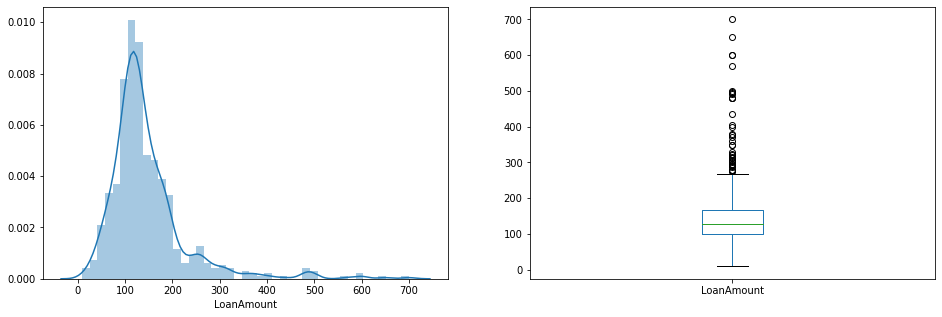

In [15]:
plt.figure() 
plt.subplot(121) 
sns.distplot(train['LoanAmount']); 
plt.subplot(122) 
train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

In [16]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


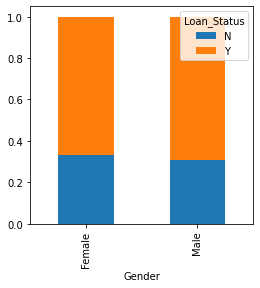

In [17]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))


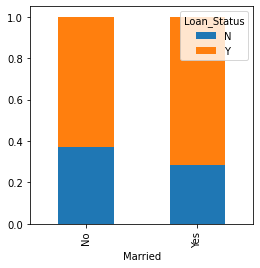

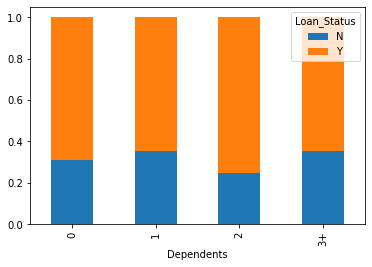

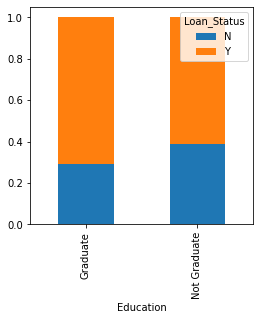

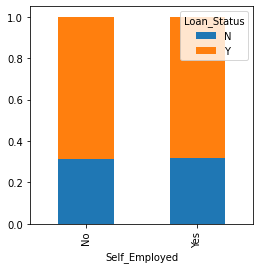

In [18]:
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

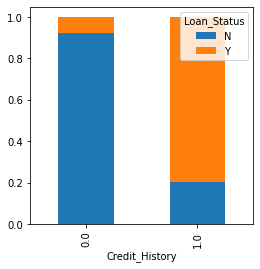

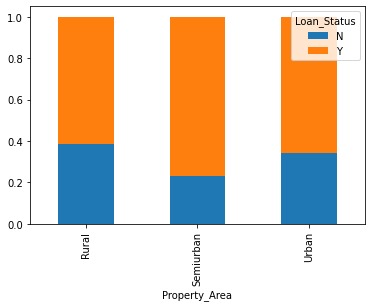

In [19]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

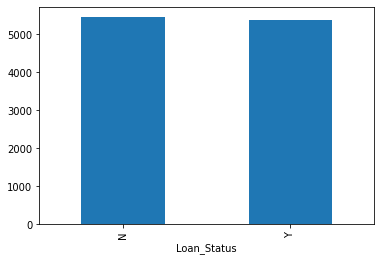

In [20]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

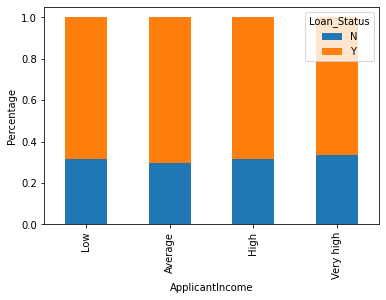

In [21]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high']

train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

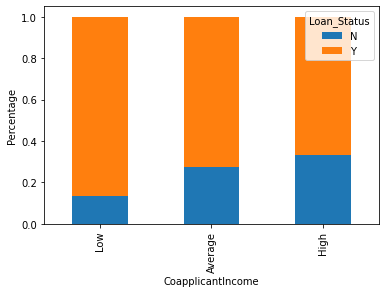

In [22]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')

Combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.

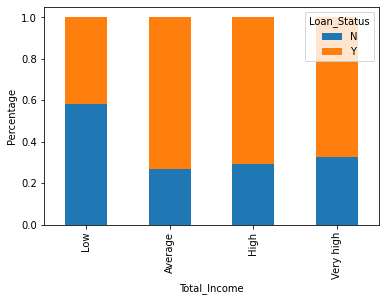

In [23]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high'] 

train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

In [0]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'Total_Income_bin', 'Total_Income'], axis=1)


In [0]:
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True) 

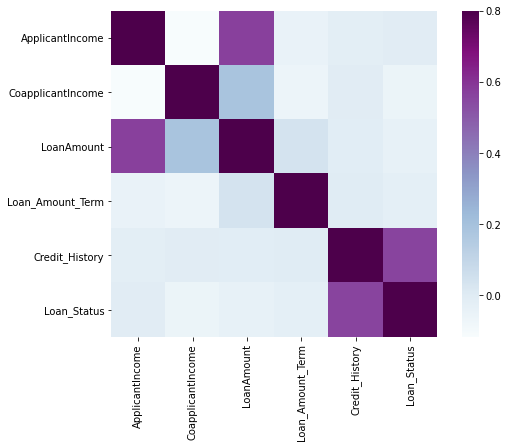

In [27]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

In [28]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [0]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [30]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [0]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [0]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [33]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [0]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [0]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])

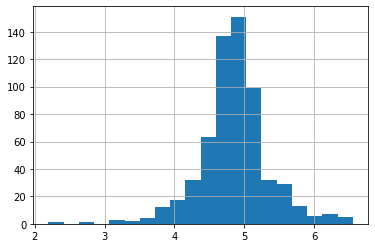

In [36]:
train['LoanAmount_log'].hist(bins=20) 


In [0]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

In [0]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

In [39]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

X.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'LoanAmount_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [43]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

model = LogisticRegression() 
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,          
                   intercept_scaling=1, max_iter=110, multi_class='ovr', n_jobs=1,          
                   penalty='l2', random_state=1, solver='liblinear', tol=0.0001,          
                   verbose=0, warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=110,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [0]:
pred_cv = model.predict(x_cv)

In [45]:
accuracy_score(y_cv,pred_cv)

0.8324324324324325

In [0]:
pred_test = model.predict(test)

In [0]:
submission=pd.read_csv("/content/drive/My Drive/analytics vidhya/sample_submission_49d68Cx.csv")

In [0]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']

In [0]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [0]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

In [0]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome'] 
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

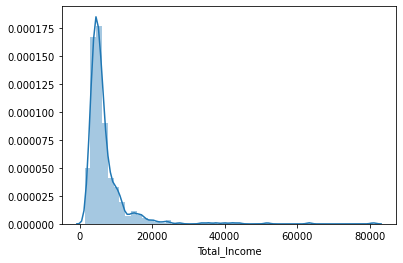

In [52]:
sns.distplot(train['Total_Income'])

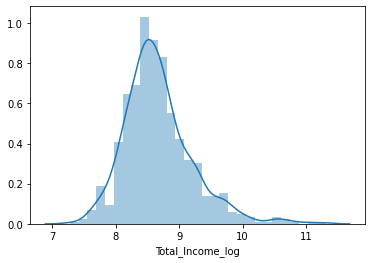

In [53]:
train['Total_Income_log'] = np.log(train['Total_Income']) 
sns.distplot(train['Total_Income_log']); 
test['Total_Income_log'] = np.log(test['Total_Income'])

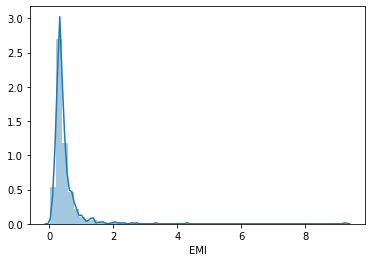

In [54]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term'] 
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']
sns.distplot(train['EMI'])

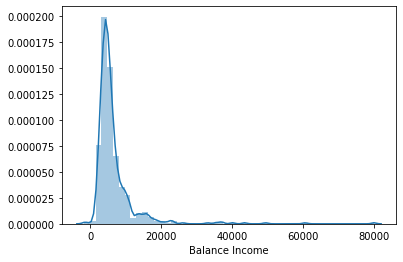

In [55]:
train['Balance Income']=train['Total_Income']-(train['EMI']*1000)
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance Income'])

In [0]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [0]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

In [58]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

model = LogisticRegression()     
model.fit(x_train,y_train)     

pred_val = model.predict(x_cv) 
accuracy_score(y_cv, pred_val)

0.772972972972973

In [0]:
pred_test = model.predict(test)

In [0]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [0]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [0]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Log2.csv')